In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Datasets/insurance.csv')

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
df['sex'] = df['sex'].map({'female':0, 'male':1})

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [12]:
df['smoker'] = df['smoker'].map({'no':0, 'yes':1})
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [13]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
df['region'] = df['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})


In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [16]:
X = df.drop(['charges'], axis=1)
y = df['charges']

In [17]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)
svm = SVR()
svm.fit(X_train, y_train)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

In [31]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test, 'lr':y_pred1, 'svm':y_pred2, 'rf':y_pred3, 'gr':y_pred4})

In [32]:
df1

,Actual,lr,svm,rf,gr
918,13041.92100,11604.937499,9599.066112,18415.569086,14325.936963
755,5031.26955,6560.201118,9422.002021,5331.927103,8103.719197
207,20984.09360,31555.118895,9444.731202,20601.932438,21776.000748
520,25656.57526,10181.938734,9540.961364,9634.415802,10311.058352
695,3201.24515,8077.832822,9409.074028,4934.094410,4972.064760
...,...,...,...,...,...
298,38746.35510,32798.650460,9426.198646,41955.147242,39655.924362
369,3481.86800,4813.606404,9376.346757,9849.905888,8437.995089
153,19964.74630,30871.032062,9486.945121,21831.708475,23160.287961
264,20462.99766,15008.594876,9563.271378,13429.181929,13948.163219


In [33]:
import matplotlib.pyplot as plt

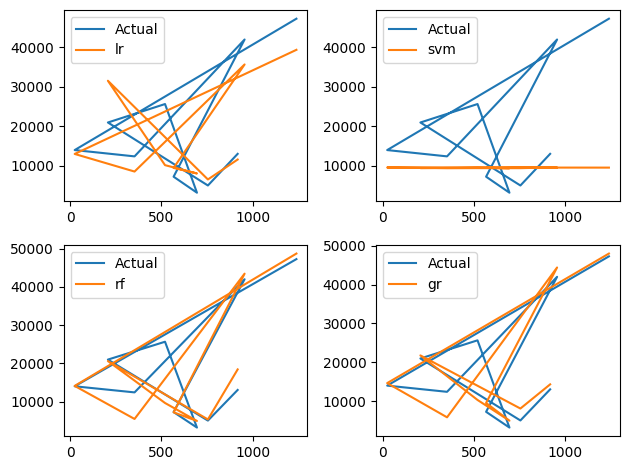

In [36]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:10], label= 'Actual')
plt.plot(df1['lr'].iloc[0:10], label= 'lr') 
plt.legend()


plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:10], label= 'Actual')
plt.plot(df1['svm'].iloc[0:10], label= 'svm')
plt.legend()



plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:10], label= 'Actual')
plt.plot(df1['rf'].iloc[0:10], label= 'rf')
plt.legend()


plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:10], label= 'Actual')
plt.plot(df1['gr'].iloc[0:10], label= 'gr')
plt.legend()



plt.tight_layout()


In [37]:
from sklearn import metrics

In [38]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

In [39]:
print(score1, score2, score3, score4)

0.7531430170965645 -0.060272460088530266 0.8348630806959448 0.8627881466917955


In [40]:
s1 = metrics.mean_absolute_error(y_test, y_pred1)
s2 = metrics.mean_absolute_error(y_test, y_pred2)
s3 = metrics.mean_absolute_error(y_test, y_pred3)
s4 = metrics.mean_absolute_error(y_test, y_pred4)

print(s1, s2, s3, s4)

3994.930568410073 8247.115226650983 2721.1675787663876 2513.8384007151826


In [43]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [44]:
import joblib
joblib.dump(gr, "joblib/helth_insu")

['helth_insu']